In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from tabulate import tabulate

In [51]:
df_leitos_2022 = pd.read_csv("Leitos_2022.csv", encoding='latin-1')

In [52]:
df_leitos_2023 = pd.read_csv("Leitos_2023.csv", encoding='latin-1')
df_leitos = df_leitos_2023

In [53]:
num_linhas_2022 = df_leitos_2022.shape[0]
num_linhas_2023 = df_leitos_2023.shape[0]

print('linhas 2022: ', num_linhas_2022)
print('linhas 2023: ', num_linhas_2023)

linhas 2022:  85313
linhas 2023:  63344


In [54]:
# Obter as colunas de cada DataFrame
colunas_2022 = sorted(df_leitos_2022.columns)
colunas_2023 = sorted(df_leitos_2023.columns)

# Verificar se as colunas são as mesmas em ambos os DataFrames
if colunas_2022 == colunas_2023:
    print("As colunas são as mesmas nos dois DataFrames.")
else:
    # Encontrar as colunas que estão em um DataFrame, mas não no outro
    colunas_faltando_2022 = [coluna for coluna in colunas_2023 if coluna not in colunas_2022]
    colunas_faltando_2023 = [coluna for coluna in colunas_2022 if coluna not in colunas_2023]

    print("As colunas são diferentes nos dois DataFrames.")
    print("Colunas faltando no DataFrame de 2022:", colunas_faltando_2022)
    print("Colunas faltando no DataFrame de 2023:", colunas_faltando_2023)

As colunas são as mesmas nos dois DataFrames.


In [55]:
print(tabulate(df_leitos_2022.head(), headers='keys', tablefmt='pretty'))

+---+--------+----------+----+-------------------------+----------------------+------+----------------------------+-----------------------------------------------+-----------+-----------------+-----------------+-------------------+------------------------+-------------------------------+-------------+----------------+-----------+----------+--------------+----------+-------------------+------------+-----------------+---------------+------------------+----------------+----------------------+--------------------+--------------------+------------------+--------------------+------------------+-----------------------+---------------------+
|   |  COMP  |  REGIAO  | UF |        MUNICIPIO        | MOTIVO_DESABILITACAO | CNES |    NOME_ESTABELECIMENTO    |                 RAZAO_SOCIAL                  | TP_GESTAO | CO_TIPO_UNIDADE | DS_TIPO_UNIDADE | NATUREZA_JURIDICA | DESC_NATUREZA_JURIDICA |         NO_LOGRADOURO         | NU_ENDERECO | NO_COMPLEMENTO | NO_BAIRRO |  CO_CEP  | NU_TELEFONE  | 

In [56]:
print(tabulate(df_leitos_2023.head(), headers='keys', tablefmt='pretty'))

+---+--------+----------+----+-------------------------+----------------------+------+----------------------------------------+-------------------------------------------------+-----------+-----------------+------------------------+-------------------+------------------------+-------------------------------+-------------+----------------+---------------------+----------+--------------+---------------------------------+-------------------+------------+-----------------+---------------+------------------+----------------+----------------------+--------------------+--------------------+------------------+--------------------+------------------+-----------------------+---------------------+
|   |  COMP  |  REGIAO  | UF |        MUNICIPIO        | MOTIVO_DESABILITACAO | CNES |          NOME_ESTABELECIMENTO          |                  RAZAO_SOCIAL                   | TP_GESTAO | CO_TIPO_UNIDADE |    DS_TIPO_UNIDADE     | NATUREZA_JURIDICA | DESC_NATUREZA_JURIDICA |         NO_LOGRADOURO     

In [57]:
print("Colunas presentes:", df_leitos.columns)

Colunas presentes: Index(['COMP', 'REGIAO', 'UF', 'MUNICIPIO', 'MOTIVO_DESABILITACAO', 'CNES',
       'NOME_ESTABELECIMENTO', 'RAZAO_SOCIAL', 'TP_GESTAO', 'CO_TIPO_UNIDADE',
       'DS_TIPO_UNIDADE', 'NATUREZA_JURIDICA', 'DESC_NATUREZA_JURIDICA',
       'NO_LOGRADOURO', 'NU_ENDERECO', 'NO_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP',
       'NU_TELEFONE', 'NO_EMAIL', 'LEITOS_EXISTENTES', 'LEITOS_SUS',
       'UTI_TOTAL_EXIST', 'UTI_TOTAL_SUS', 'UTI_ADULTO_EXIST',
       'UTI_ADULTO_SUS', 'UTI_PEDIATRICO_EXIST', 'UTI_PEDIATRICO_SUS',
       'UTI_NEONATAL_EXIST', 'UTI_NEONATAL_SUS', 'UTI_QUEIMADO_EXIST',
       'UTI_QUEIMADO_SUS', 'UTI_CORONARIANA_EXIST', 'UTI_CORONARIANA_SUS'],
      dtype='object')


In [58]:
print(df_leitos['DESC_NATUREZA_JURIDICA'].unique())

['HOSPITAL_PRIVADO' 'HOSPITAL_PÚBLICO' 'HOSPITAL_FILANTRÓPICO']


In [59]:
print(df_leitos['MOTIVO_DESABILITACAO'].unique())

[nan]


In [60]:
# tamanho do conjunto de dados (número de linhas e colunas)
print("Número de linhas e colunas:", df_leitos.shape)

Número de linhas e colunas: (63344, 34)


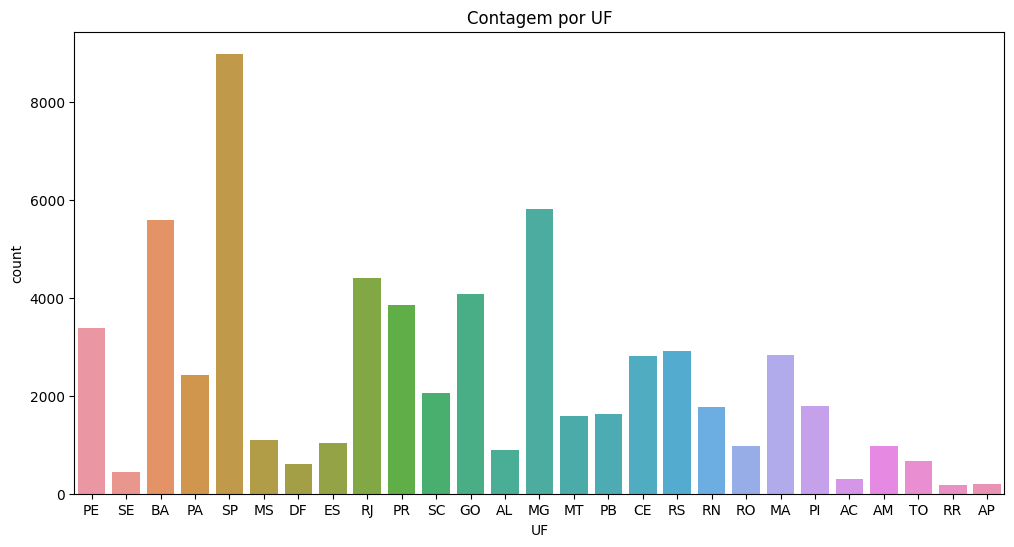

In [61]:
# Gráfico de barras para a contagem de registros por 'UF'
plt.figure(figsize=(12, 6))
sns.countplot(x='UF', data=df_leitos)
plt.title('Contagem por UF')
plt.show()

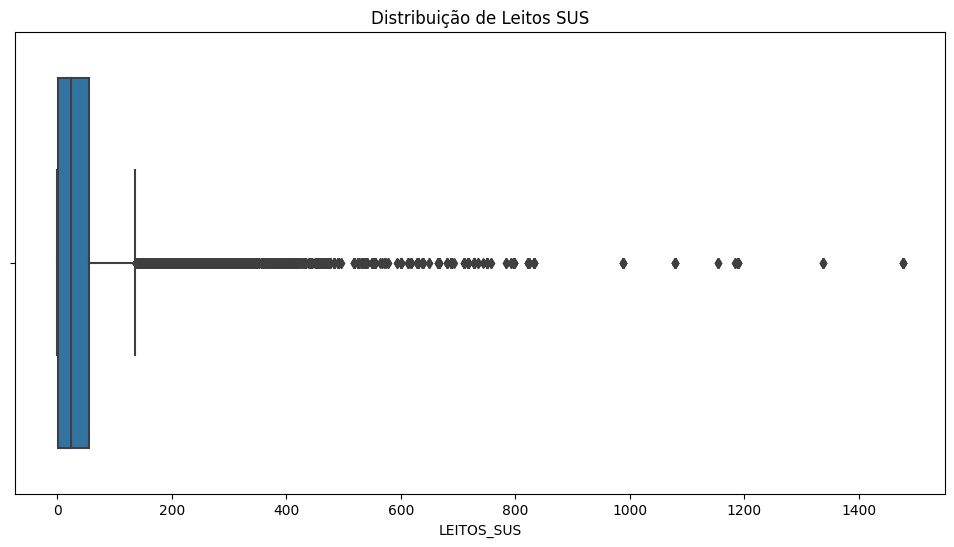

In [62]:
# Boxplot para visualizar a distribuição dos leitos SUS
plt.figure(figsize=(12, 6))
sns.boxplot(x='LEITOS_SUS', data=df_leitos)
plt.title('Distribuição de Leitos SUS')
plt.show()

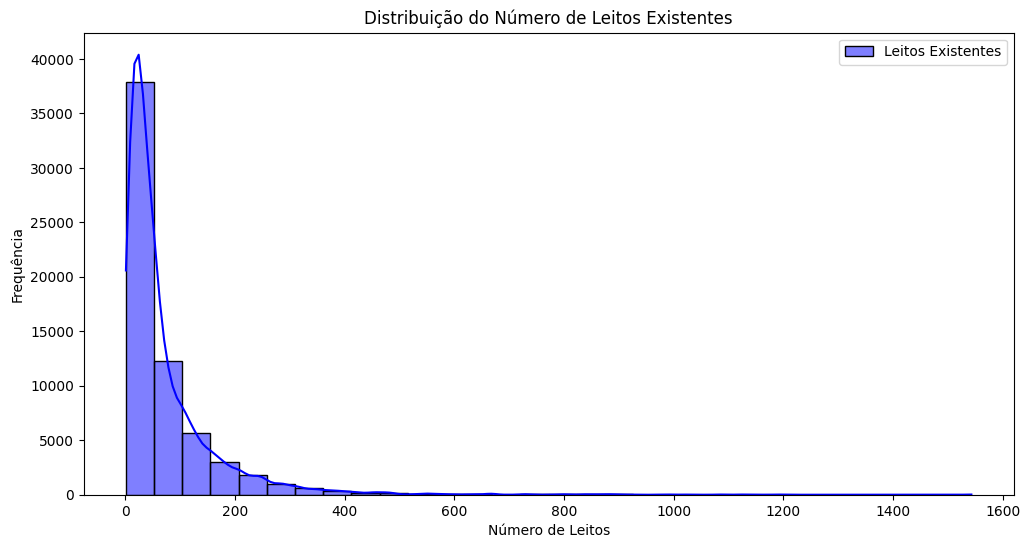

In [63]:
# Distribuição do número de leitos existentes
plt.figure(figsize=(12, 6))
sns.histplot(df_leitos['LEITOS_EXISTENTES'], bins=30, kde=True, color='blue', label='Leitos Existentes')
plt.title('Distribuição do Número de Leitos Existentes')
plt.xlabel('Número de Leitos')
plt.ylabel('Frequência')
plt.legend()
plt.show()

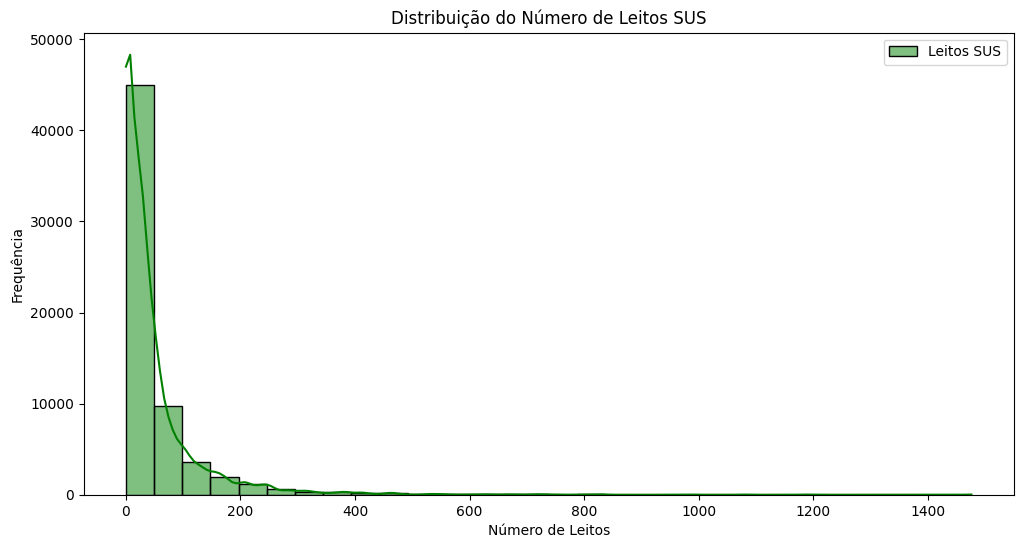

In [64]:
# Distribuição do número de leitos SUS
plt.figure(figsize=(12, 6))
sns.histplot(df_leitos['LEITOS_SUS'], bins=30, kde=True, color='green', label='Leitos SUS')
plt.title('Distribuição do Número de Leitos SUS')
plt.xlabel('Número de Leitos')
plt.ylabel('Frequência')
plt.legend()
plt.show()

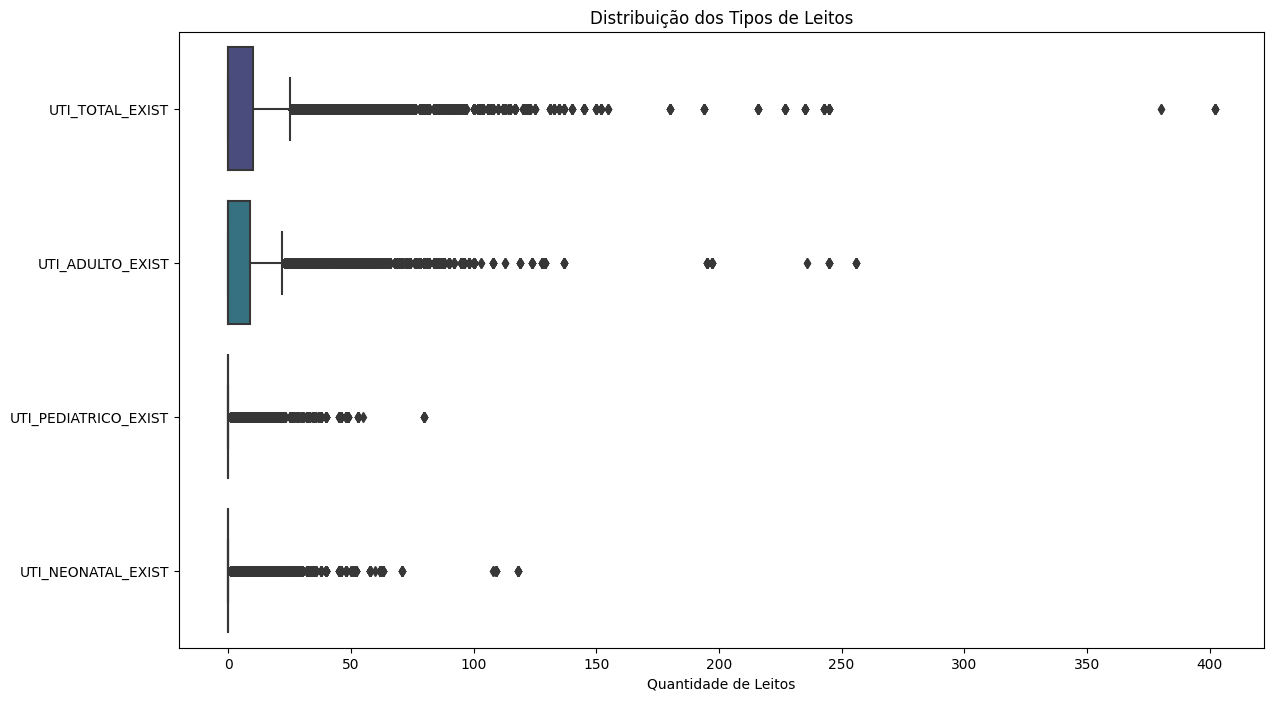

In [65]:
# Selecionando colunas relevantes para a distribuição dos tipos de leitos
tipos_leitos = df_leitos[['UTI_TOTAL_EXIST', 'UTI_ADULTO_EXIST', 'UTI_PEDIATRICO_EXIST', 'UTI_NEONATAL_EXIST']]

# Boxplot para visualizar a distribuição dos tipos de leitos
plt.figure(figsize=(14, 8))
sns.boxplot(data=tipos_leitos, orient='h', palette='viridis')
plt.title('Distribuição dos Tipos de Leitos')
plt.xlabel('Quantidade de Leitos')
plt.show()


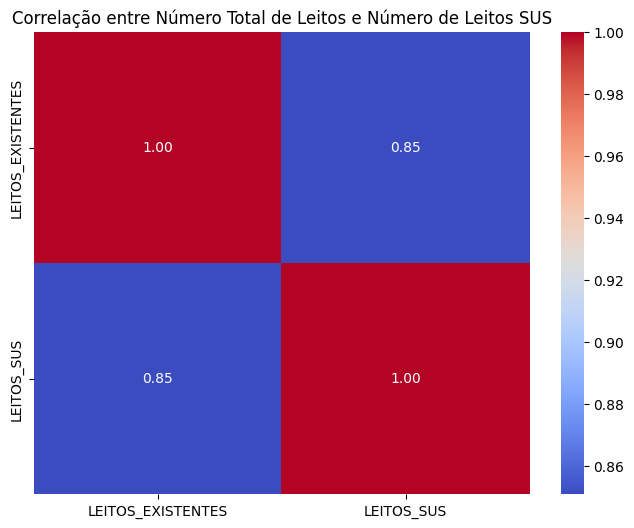

In [66]:
# Correlação entre o número total de leitos e o número de leitos SUS
correlation_leitos = df_leitos[['LEITOS_EXISTENTES', 'LEITOS_SUS']].corr()

# Heatmap para visualização da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_leitos, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Número Total de Leitos e Número de Leitos SUS')
plt.show()

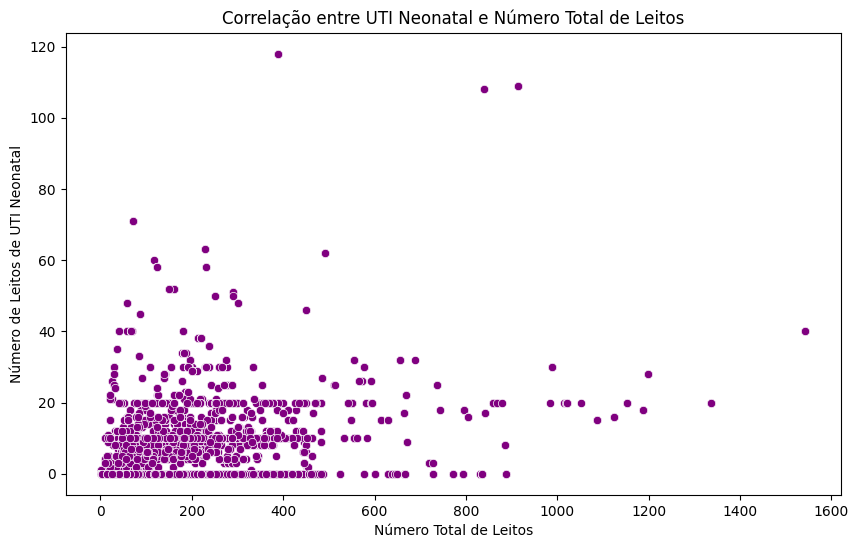

In [67]:
# Selecionando colunas relevantes para a correlação
correlation_leitos_especificos = df_leitos[['UTI_NEONATAL_EXIST', 'LEITOS_EXISTENTES']]

# Scatterplot para visualizar a correlação
plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_leitos_especificos, x='LEITOS_EXISTENTES', y='UTI_NEONATAL_EXIST', color='purple')
plt.title('Correlação entre UTI Neonatal e Número Total de Leitos')
plt.xlabel('Número Total de Leitos')
plt.ylabel('Número de Leitos de UTI Neonatal')
plt.show()

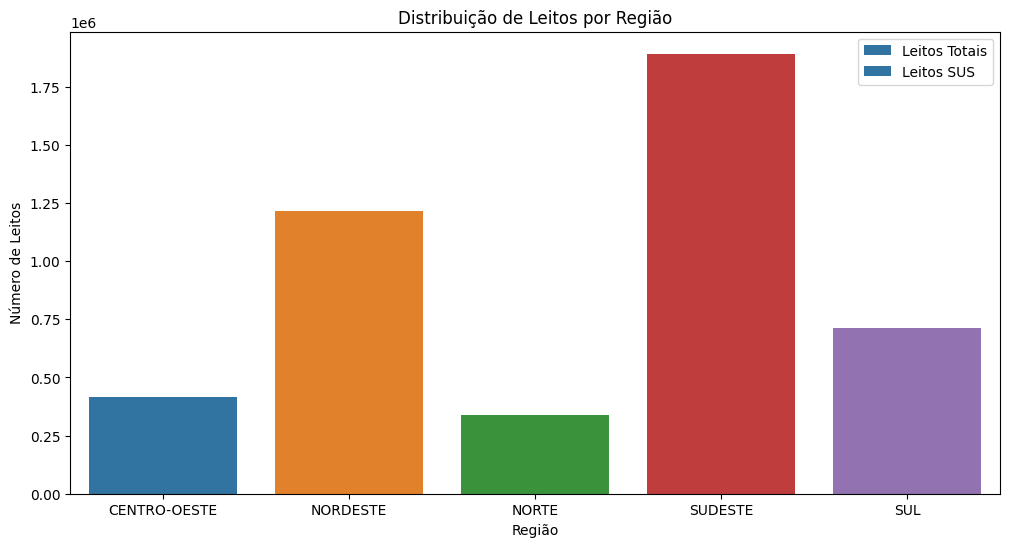

In [68]:
# Agrupar por região e somar os leitos
leitos_por_regiao = df_leitos.groupby('REGIAO')[['LEITOS_EXISTENTES', 'LEITOS_SUS']].sum()

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=leitos_por_regiao.reset_index(), x='REGIAO', y='LEITOS_EXISTENTES', label='Leitos Totais')
sns.barplot(data=leitos_por_regiao.reset_index(), x='REGIAO', y='LEITOS_SUS', label='Leitos SUS')
plt.title('Distribuição de Leitos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Leitos')
plt.legend()
plt.show()

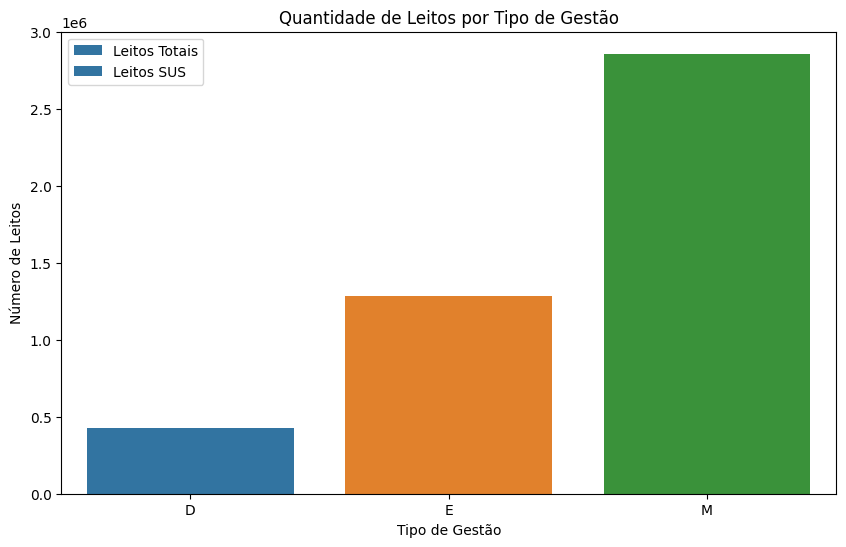

In [69]:
# Agrupar por tipo de gestão e somar os leitos
leitos_por_gestao = df_leitos.groupby('TP_GESTAO')[['LEITOS_EXISTENTES', 'LEITOS_SUS']].sum()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=leitos_por_gestao.reset_index(), x='TP_GESTAO', y='LEITOS_EXISTENTES', label='Leitos Totais')
sns.barplot(data=leitos_por_gestao.reset_index(), x='TP_GESTAO', y='LEITOS_SUS', label='Leitos SUS')
plt.title('Quantidade de Leitos por Tipo de Gestão')
plt.xlabel('Tipo de Gestão')
plt.ylabel('Número de Leitos')
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

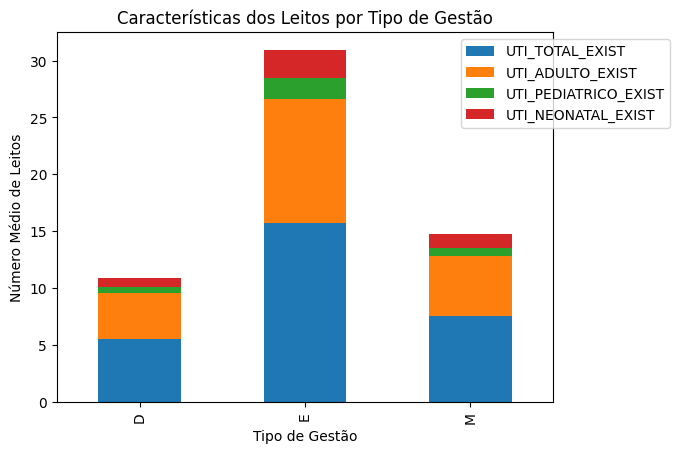

In [70]:
# Agrupar por tipo de gestão e obter a média das características dos leitos
caracteristicas_por_gestao = df_leitos.groupby('TP_GESTAO')[['UTI_TOTAL_EXIST', 'UTI_ADULTO_EXIST', 'UTI_PEDIATRICO_EXIST', 'UTI_NEONATAL_EXIST']].mean()

# Plotar gráfico de barras
plt.figure(figsize=(12, 8))
ax = caracteristicas_por_gestao.plot(kind='bar', stacked=True)
plt.title('Características dos Leitos por Tipo de Gestão')
plt.xlabel('Tipo de Gestão')
plt.ylabel('Número Médio de Leitos')

# Ajustar a posição da legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

<Figure size 1200x800 with 0 Axes>

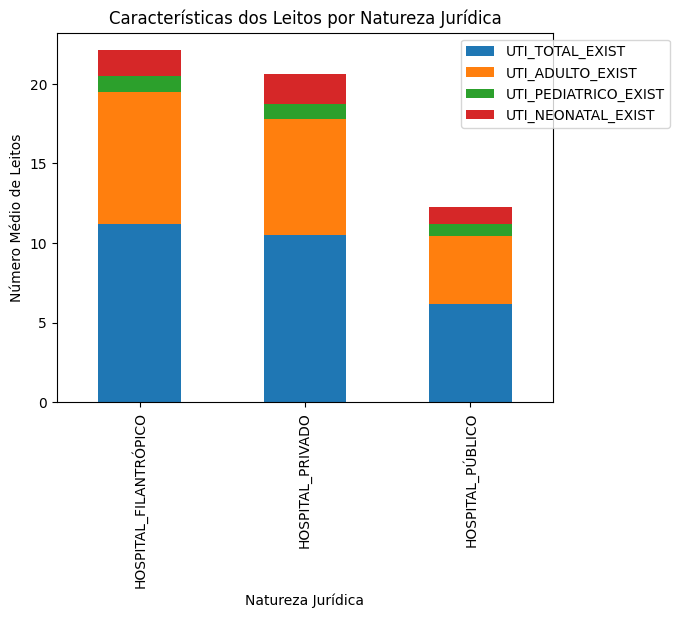

In [71]:
# Agrupar por natureza jurídica e obter a média das características dos leitos
caracteristicas_por_juridica = df_leitos.groupby('DESC_NATUREZA_JURIDICA')[['UTI_TOTAL_EXIST', 'UTI_ADULTO_EXIST', 'UTI_PEDIATRICO_EXIST', 'UTI_NEONATAL_EXIST']].mean()

# Plotar gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
ax = caracteristicas_por_juridica.plot(kind='bar', stacked=True)
plt.title('Características dos Leitos por Natureza Jurídica')
plt.xlabel('Natureza Jurídica')
plt.ylabel('Número Médio de Leitos')
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [72]:
# Verificar valores únicos na coluna 'MOTIVO_DESABILITACAO'
valores_desabilitacao = df_leitos['MOTIVO_DESABILITACAO'].unique()
print(valores_desabilitacao)


[nan]


In [73]:
# Verificar valores ausentes
print(df_leitos.isnull().sum())

COMP                          0
REGIAO                        0
UF                            0
MUNICIPIO                     0
MOTIVO_DESABILITACAO      63344
CNES                          0
NOME_ESTABELECIMENTO          0
RAZAO_SOCIAL                  0
TP_GESTAO                     0
CO_TIPO_UNIDADE               0
DS_TIPO_UNIDADE               0
NATUREZA_JURIDICA             0
DESC_NATUREZA_JURIDICA        0
NO_LOGRADOURO                 0
NU_ENDERECO                   0
NO_COMPLEMENTO            51623
NO_BAIRRO                     0
CO_CEP                        0
NU_TELEFONE                7074
NO_EMAIL                  21505
LEITOS_EXISTENTES             0
LEITOS_SUS                    0
UTI_TOTAL_EXIST               0
UTI_TOTAL_SUS                 0
UTI_ADULTO_EXIST              0
UTI_ADULTO_SUS                0
UTI_PEDIATRICO_EXIST          0
UTI_PEDIATRICO_SUS            0
UTI_NEONATAL_EXIST            0
UTI_NEONATAL_SUS              0
UTI_QUEIMADO_EXIST            0
UTI_QUEI

In [74]:
# Verificar e remover duplicatas
df_leitos = df_leitos.drop_duplicates()

# Verificar se há duplicatas restantes
print("Duplicatas restantes:", df_leitos.duplicated().sum())

Duplicatas restantes: 0


In [75]:
df_cleaned = df_leitos

In [76]:
# Lista de colunas a serem excluídas
colunas_para_excluir = ['NO_COMPLEMENTO', 'NU_TELEFONE', 'NO_EMAIL', 'MOTIVO_DESABILITACAO', 'NO_LOGRADOURO', 'NU_ENDERECO', 'NO_BAIRRO']

# Excluindo as colunas do DataFrame
df_cleaned = df_leitos.drop(columns=colunas_para_excluir, errors='ignore')

# Exibindo o DataFrame atualizado
print(tabulate(df_cleaned.head(), headers='keys', tablefmt='pretty'))

+---+--------+----------+----+-------------------------+------+----------------------------------------+-------------------------------------------------+-----------+-----------------+------------------------+-------------------+------------------------+----------+-------------------+------------+-----------------+---------------+------------------+----------------+----------------------+--------------------+--------------------+------------------+--------------------+------------------+-----------------------+---------------------+
|   |  COMP  |  REGIAO  | UF |        MUNICIPIO        | CNES |          NOME_ESTABELECIMENTO          |                  RAZAO_SOCIAL                   | TP_GESTAO | CO_TIPO_UNIDADE |    DS_TIPO_UNIDADE     | NATUREZA_JURIDICA | DESC_NATUREZA_JURIDICA |  CO_CEP  | LEITOS_EXISTENTES | LEITOS_SUS | UTI_TOTAL_EXIST | UTI_TOTAL_SUS | UTI_ADULTO_EXIST | UTI_ADULTO_SUS | UTI_PEDIATRICO_EXIST | UTI_PEDIATRICO_SUS | UTI_NEONATAL_EXIST | UTI_NEONATAL_SUS | UTI_QUEI

In [77]:
# Substitua 'variaveis_relevantes' pelas variáveis escolhidas
variaveis_relevantes = df_cleaned[['REGIAO','UF', 'MUNICIPIO','TP_GESTAO', 'DESC_NATUREZA_JURIDICA', 'LEITOS_EXISTENTES', 'LEITOS_SUS']]

In [78]:
# Verificar dados ausentes nas variáveis escolhidas
dados_ausentes = variaveis_relevantes.isnull().sum()
print("Dados Ausentes nas Variáveis Relevantes:")
print(dados_ausentes)

Dados Ausentes nas Variáveis Relevantes:
REGIAO                    0
UF                        0
MUNICIPIO                 0
TP_GESTAO                 0
DESC_NATUREZA_JURIDICA    0
LEITOS_EXISTENTES         0
LEITOS_SUS                0
dtype: int64


In [79]:
df_leitos_2012 = pd.read_csv("Leitos_2012.csv", encoding='latin-1')
df_leitos_2013 = pd.read_csv("Leitos_2013.csv", encoding='latin-1')
df_leitos_2014 = pd.read_csv("Leitos_2014.csv", encoding='latin-1')
df_leitos_2015 = pd.read_csv("Leitos_2015.csv", encoding='latin-1')
df_leitos_2016 = pd.read_csv("Leitos_2016.csv", encoding='latin-1')
df_leitos_2017 = pd.read_csv("Leitos_2017.csv", encoding='latin-1')
df_leitos_2018 = pd.read_csv("Leitos_2018.csv", encoding='latin-1')
df_leitos_2019 = pd.read_csv("Leitos_2019.csv", encoding='latin-1')
df_leitos_2020 = pd.read_csv("Leitos_2020.csv", encoding='latin-1')

In [103]:
data = {'Ano': [2012, 2013, 2014, 2015, 2016, 2017], 
        'Leitos': [df_leitos_2012['LEITOS EXISTENTE'].sum(), df_leitos_2013['LEITOS EXISTENTE'].sum(), df_leitos_2014['LEITOS EXISTENTE'].sum(), df_leitos_2015['LEITOS EXISTENTE'].sum(), df_leitos_2018['LEITOS EXISTENTE'].sum(), df_leitos_2017['LEITOS EXISTENTE'].sum()]}
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='pretty'))

targets = [2018, 2019, 2020]

df_pred = pd.DataFrame({'Ano': targets})
df = pd.concat([df, df_pred], ignore_index=True)

df.fillna(df.mean(), inplace=True)

X = df[['Ano']]
y = df['Leitos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(df_pred[['Ano']])
print(y_pred)
print(df_leitos_2018['LEITOS EXISTENTE'].sum(), df_leitos_2019['LEITOS EXISTENTE'].sum(), df_leitos_2020['LEITOS EXISTENTE'].sum())

df_previst = df.copy()

new_data = {'Ano': targets, 'Leitos': y_pred}
new_df = pd.DataFrame(new_data)
new_df.reset_index(drop=True, inplace=True)
new_df = new_df.drop_duplicates()
df_p = pd.concat([df_previst, new_df], ignore_index=True)
df_p = df_p.drop(index=range(6, 9))
df = df.drop(index=range(6, 9))

real_data = {'Ano': targets, 'Leitos': [df_leitos_2018['LEITOS EXISTENTE'].sum(), df_leitos_2019['LEITOS EXISTENTE'].sum(), df_leitos_2020['LEITOS EXISTENTE'].sum()]}
df_real = pd.DataFrame(real_data)
print(df_real)

mae = mean_absolute_error(y_test, model.predict(X_test))

+---+------+---------+
|   | Ano  | Leitos  |
+---+------+---------+
| 0 | 2012 | 5972844 |
| 1 | 2013 | 5968990 |
| 2 | 2014 | 5976965 |
| 3 | 2015 | 5837085 |
| 4 | 2016 | 5766169 |
| 5 | 2017 | 5785746 |
+---+------+---------+
[5840782.39735772 5826474.16056911 5812165.92378049]
5766169 5732039 6087197
    Ano   Leitos
0  2018  5766169
1  2019  5732039
2  2020  6087197


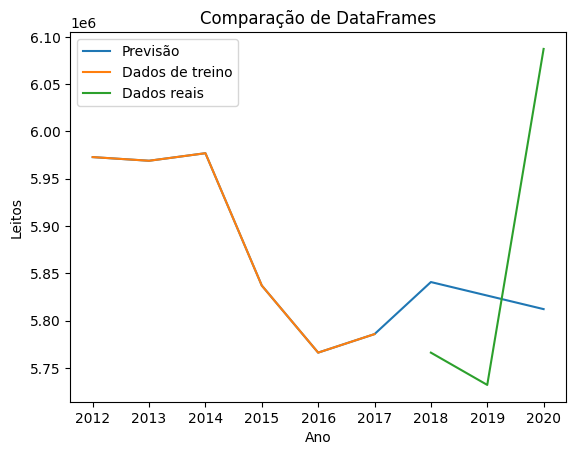

In [105]:
plt.plot(df_p['Ano'], df_p['Leitos'], label='Previsão')
plt.plot(df['Ano'], df['Leitos'], label='Dados de treino')
plt.plot(df_real['Ano'], df_real['Leitos'], label='Dados reais')

# Adicionando legendas e rótulos
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Leitos')
plt.title('Comparação de DataFrames')

# Exibindo o gráfico
plt.show()

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecionar colunas para treinamento
features = ['LEITOS_EXISTENTES', 'UTI_TOTAL_EXIST', 'UTI_TOTAL_SUS']

# Criar conjunto de dados simplificado
df_simples = df_cleaned[features + ['LEITOS_SUS']].copy()

# Dividir o conjunto de dados em treinamento e teste
train_data, test_data = train_test_split(df_simples, test_size=0.2, random_state=42)

# Separar as variáveis independentes (X) e a variável dependente (y)
X_train = train_data[features]
y_train = train_data['LEITOS_SUS']
X_test = test_data[features]
y_test = test_data['LEITOS_SUS']

# Criar e treinar o modelo de Regressão Linear
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_regressao.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir métricas de desempenho
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 812.8808516529987
R-squared (R2): 0.8825709697804734
